### Friedman & Wilcoxon Tests

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare, wilcoxon, rankdata
import matplotlib.pyplot as plt

##### DATA ENTRY (F1-SCORE)

In [ ]:
data = {
    # --- AM Variants ---
    "AM(sp, se)":   [93.46, 70.97, 75.91, 75.37, 95.82, 96.38, 92.12, 93.80],
    "AM(conf, si)": [94.70, 67.43, 74.50, 68.92, 93.99, 98.18, 92.63, 93.90],
    "AM(conf, sp)": [99.63, 79.93, 74.74, 61.92, 96.97, 98.98, 92.63, 94.59],
    "AM(conf, se)": [85.62, 77.98, 72.98, 67.09, 96.47, 95.96, 92.63, 94.25],

    # --- MOEA-AM Variants ---
    "MOEA-AM(sp, se)":   [62.33, 64.49, 82.62, 66.73, 94.18, 96.19, 92.63, 94.54],
    "MOEA-AM(conf, si)": [99.70, 72.43, 79.89, 60.53, 94.12, 96.51, 92.63, 93.99],
    "MOEA-AM(conf, sp)": [99.95, 86.26, 79.70, 59.74, 94.12, 96.81, 92.63, 94.61],
    "MOEA-AM(conf, se)": [76.90, 34.50, 81.97, 68.56, 94.36, 96.71, 92.63, 95.34],

    # --- MOEA-AM* Variants ---
    "MOEA-AM*(sp, se)":   [77.86, 58.42, 80.92, 66.20, 94.65, 96.65, 92.63, 94.25],
    "MOEA-AM*(conf, si)": [99.16, 68.26, 80.90, 68.24, 94.12, 96.40, 92.63, 95.27],
    "MOEA-AM*(conf, sp)": [95.85, 86.87, 79.17, 63.08, 94.70, 96.20, 92.63, 95.01],
    "MOEA-AM*(conf, se)": [73.99, 68.59, 83.32, 66.43, 94.03, 96.80, 92.63, 94.97]
}

datasets = ["Mushroom", "Tic-Tac-Toe", "Hepatitis", "Ljubljana", "Car", "Kr-vs-K", "Zoo", "Flare"]
df = pd.DataFrame(data, index=datasets)

##### FRIEDMAN TEST

In [ ]:
print("==================================================")
print("GLOBAL COMPARISON (12 Variants)")
print("==================================================")

stat, p = friedmanchisquare(*[df[col] for col in df.columns])

print(f"Friedman Statistic: {stat:.3f}")
print(f"P-value: {p:.6f}")

if p < 0.05:
    print(">> Result: Significant differences found.\n")
else:
    print(">> Result: No significant differences found.\n")

GLOBAL COMPARISON (12 Variants)
Friedman Statistic: 5.945
P-value: 0.876994
>> Result: No significant differences found.



##### MEAN RANKS

In [8]:
rank_matrix = np.apply_along_axis(lambda x: rankdata(-x, method='average'), 1, df.values)
mean_ranks_values = np.mean(rank_matrix, axis=0)
mean_ranks = pd.Series(mean_ranks_values, index=df.columns).sort_values()

print("--- Mean Ranks ---")
print(mean_ranks)

--- Mean Ranks ---
AM(conf, sp)          5.0000
MOEA-AM(conf, sp)     5.6250
MOEA-AM(conf, se)     5.7500
MOEA-AM*(conf, si)    5.7500
MOEA-AM*(conf, sp)    5.7500
MOEA-AM*(conf, se)    6.3750
MOEA-AM(conf, si)     7.0000
AM(conf, se)          7.1875
MOEA-AM*(sp, se)      7.1875
AM(sp, se)            7.3750
AM(conf, si)          7.3750
MOEA-AM(sp, se)       7.6250
dtype: float64


##### VISUALIZATION OF RANKS

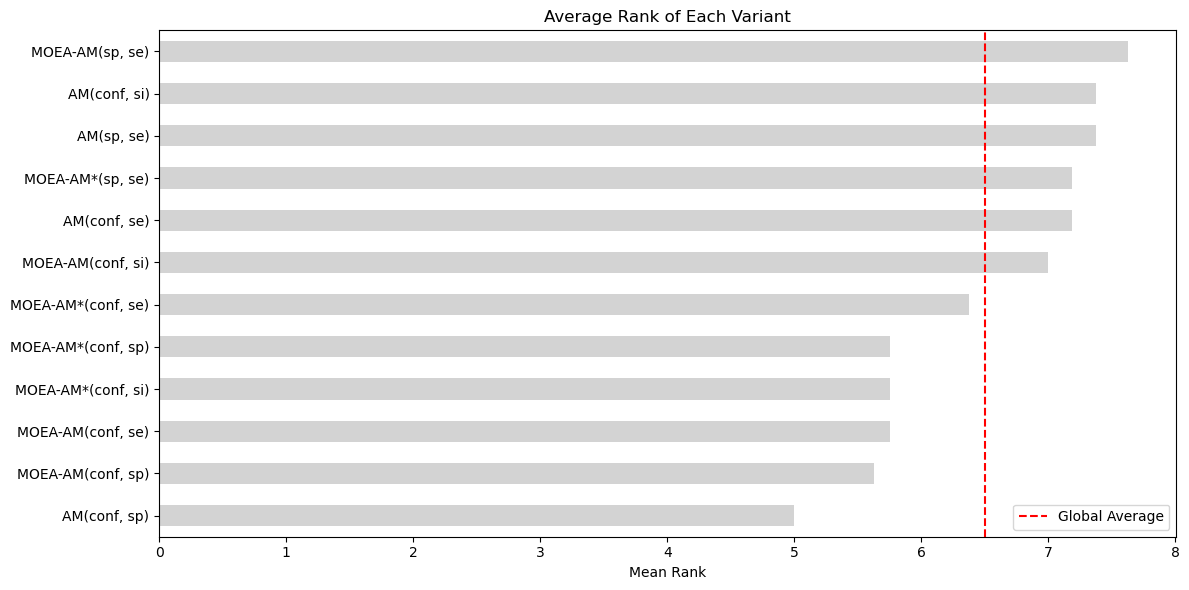

In [16]:
plt.figure(figsize=(12, 6))
mean_ranks.plot(kind='barh', color='lightgrey')
plt.title('Average Rank of Each Variant')
plt.xlabel('Mean Rank')

plt.axvline(x=mean_ranks.mean(), color='red', linestyle='--', label='Global Average')
plt.legend()
plt.tight_layout()
plt.show()